In [4]:
# imports 
import numpy as np
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

# suppress warnings (quite prevalent with pandas and numpy)
warnings.simplefilter("ignore")

pd.options.display.max_rows = 1000

# maintain directories well defined
PROJECT_ROOT_DIR = "."
ALL_DATA_DIR = "dat"
DATA_DIR = "novel-covid-data"
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, ALL_DATA_DIR, DATA_DIR)

# global variables - desired columns from dataset
COLS = ["SNo", "ObservationDate", "Province/State", "Country/Region", "Confirmed", "Deaths"]

# function for initialization
def initialize_data(dataset, data_path=DATA_PATH, cols=COLS):
    csv_path = os.path.join(data_path, dataset)
    data = pd.read_csv(csv_path, usecols=cols)
    return data

# link to data - https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
# initialize
data = initialize_data("covid_19_data.csv")
data

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,6.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1.0,0.0
4,5,01/22/2020,Gansu,Mainland China,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,26.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1.0,0.0
8,9,01/22/2020,Hainan,Mainland China,4.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1.0,0.0


In [5]:
indexes = data[data["Province/State"]=="Recovered"].index
data.drop(indexes, inplace = True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# unstratified split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
train_set


,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths
8457,8458,03/24/2020,Ningxia,Mainland China,75.0,0.0
15318,15319,04/15/2020,Australian Capital Territory,Australia,103.0,3.0
6202,6203,03/17/2020,NaN,Finland,321.0,0.0
11647,11648,04/04/2020,NaN,Congo (Brazzaville),22.0,2.0
2548,2549,02/27/2020,NaN,Lebanon,2.0,0.0
12613,12614,04/07/2020,NaN,Dominican Republic,1956.0,98.0
6235,6236,03/17/2020,Georgia,US,146.0,1.0
10453,10454,03/31/2020,NaN,Luxembourg,2178.0,23.0
16262,16263,04/18/2020,NaN,Uzbekistan,1490.0,5.0
10727,10728,04/01/2020,NaN,Gabon,18.0,1.0


In [10]:
# stratified split
country_counts = data["Country/Region"].value_counts()
labels = data["Country/Region"].astype('category').cat.categories.tolist()
singles = [i for i in labels if country_counts[i] == 1]
for i in singles:
    indexes = data[data["Country/Region"] == i].index
    data.drop(indexes, inplace = True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(data, data["Country/Region"]):
   strat_train_set = data.loc[train_index]
   strat_test_set = data.loc[test_index]

In [11]:
# check sampling ratios for US as comparison
# stratified
print("Stratified Test: ", strat_test_set["Country/Region"].value_counts()["US"]/len(strat_test_set))
print("Stratified Train: ", strat_train_set["Country/Region"].value_counts()["US"]/len(strat_train_set))

# unstratified
print("UnStratified Test: ", test_set["Country/Region"].value_counts()["US"]/len(test_set))
print("UnStratified Train: ", train_set["Country/Region"].value_counts()["US"]/len(train_set))

# original data
print("Original Data: ", data["Country/Region"].value_counts()["US"]/len(data))

Stratified Test:  0.19586082783443312
Stratified Train:  0.19087977199429987
UnStratified Test:  0.1952023988005997
UnStratified Train:  0.19280359820089954
Original Data:  0.19337613247735044


In [12]:
covid_data = strat_train_set.copy()

In [13]:
country_groups = covid_data.groupby("Country/Region")
missing_all = []
missing_none = []
missing_some = []
for k, df in country_groups: 
    if df["Province/State"].isnull().all():
        missing_all.append(k)
    elif df["Province/State"].isnull().any():
        if (~df["Province/State"].isnull()).all():
            missing_none.append(k)
        else: 
            missing_some.append(k)

print(missing_all, missing_none, missing_some)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'French Guiana', 'Gabon', 'Gambia', 'Gambia, The', 'Georgia', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Hait

In [15]:
def country_to_province(df, col_name="Region"):
    df.loc[df["Province/State"].isnull(), col_name] = df["Country/Region"] 
    df.loc[(~df["Province/State"].isnull()), col_name] = df["Province/State"]
    df.drop("Country/Region", axis = 1, inplace = True)
    df.drop("Province/State", axis = 1, inplace = True)

covid_data

,SNo,ObservationDate,Confirmed,Deaths,Region
1426,1427.0,02/14/2020,419.0,11.0,Heilongjiang
9390,9391.0,03/27/2020,203.0,0.0,Rhode Island
15488,15489.0,04/16/2020,862.0,27.0,Cuba
8244,8245.0,03/24/2020,382.0,1.0,Croatia
14448,14449.0,04/12/2020,897.0,44.0,Puerto Rico
14980,14981.0,04/14/2020,4933.0,28.0,United Arab Emirates
8240,8241.0,03/24/2020,378.0,3.0,Colombia
1754,1755.0,02/18/2020,16.0,0.0,Vietnam
2207,2208.0,02/24/2020,527.0,3.0,Sichuan
10556,10557.0,03/31/2020,169.0,0.0,Faroe Islands


In [16]:
covid_data["ObsDate"] = pd.to_datetime(covid_data["ObservationDate"])

In [18]:
def days_since_first_obs(df, col_name="Day_Delta"):
    region_group = df.groupby("Region")
    df[col_name] = np.nan
    for k, group in region_group:
        group.sort_values(by = "ObsDate", inplace = True)
        first_day = group.iloc[0]["ObsDate"]
        for i in range(len(group)): 
            df.ix[(group.iloc[i]["SNo"]-1), col_name] = (group.iloc[i]["ObsDate"] - first_day).days
    
days_since_first_obs(covid_data)
covid_data


,SNo,ObservationDate,Confirmed,Deaths,Region,ObsDate,Day_Delta
1426,1427.0,02/14/2020,419.0,11.0,Heilongjiang,2020-02-14,23.0
9390,9391.0,03/27/2020,203.0,0.0,Rhode Island,2020-03-27,17.0
15488,15489.0,04/16/2020,862.0,27.0,Cuba,2020-04-16,35.0
8244,8245.0,03/24/2020,382.0,1.0,Croatia,2020-03-24,28.0
14448,14449.0,04/12/2020,897.0,44.0,Puerto Rico,2020-04-12,27.0
14980,14981.0,04/14/2020,4933.0,28.0,United Arab Emirates,2020-04-14,76.0
8240,8241.0,03/24/2020,378.0,3.0,Colombia,2020-03-24,61.0
1754,1755.0,02/18/2020,16.0,0.0,Vietnam,2020-02-18,24.0
2207,2208.0,02/24/2020,527.0,3.0,Sichuan,2020-02-24,33.0
10556,10557.0,03/31/2020,169.0,0.0,Faroe Islands,2020-03-31,27.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1315199b0>,
      dtype=object)

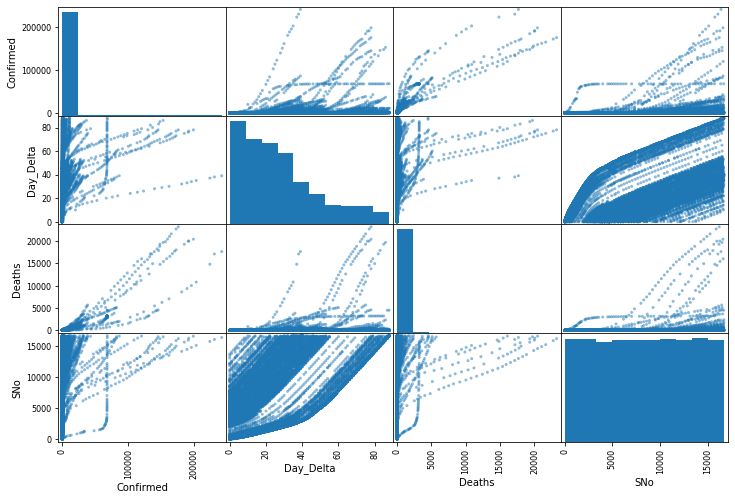

In [19]:
from pandas.plotting import scatter_matrix

# define a list of numerical attributes and categorical attributes
num_attributes = ["Confirmed", "Day_Delta", "Deaths", "SNo"]
cat_attributes = ["ObservationDate", "Region"]

scatter_matrix(covid_data[num_attributes], figsize=(12, 8))

In [23]:
from sklearn.impute import SimpleImputer

covid_data.drop("ObsDate", axis = 1, inplace = True)

# imputer -> fillnas based on a policy and save statistics for later use (numerical features)
imputer = SimpleImputer(strategy="median")

# imputer is only for numerical features so lets try it out
covid_data_num = covid_data.copy()
covid_data_num.drop(cat_attributes, axis = 1, inplace = True)

# in this case, the .fit method is simply calculating the medians of each feature
imputer.fit(covid_data_num)

# imputer also saves statistics (median) as this will be of use if we need to transform new incoming data
# we won't have to re-fit the imputer instance
# some of our features may not even have had missing values, but the imputer applied the computation anyways
print(imputer.statistics_)

# the transform method (which actually fills nas) returns a numpy array
covid_data_num_arr = imputer.transform(covid_data_num)
covid_data_num = pd.DataFrame(covid_data_num_arr, columns=covid_data_num.columns, index=covid_data_num.index)
covid_data_num 

KeyError: "['ObsDate'] not found in axis"

In [24]:
covid_data_num

,SNo,Confirmed,Deaths,Day_Delta
1426,1427.0,419.0,11.0,23.0
9390,9391.0,203.0,0.0,17.0
15488,15489.0,862.0,27.0,35.0
8244,8245.0,382.0,1.0,28.0
14448,14449.0,897.0,44.0,27.0
14980,14981.0,4933.0,28.0,76.0
8240,8241.0,378.0,3.0,61.0
1754,1755.0,16.0,0.0,24.0
2207,2208.0,527.0,3.0,33.0
10556,10557.0,169.0,0.0,27.0


In [25]:
from sklearn.preprocessing import OneHotEncoder

# the onehotencoder turns categorical variables in to binary values for each possible value of a feature 
# this avoids "confusion" on the model's part, regarding distance related relationships 

covid_data.dropna(inplace = True)
onehot_encoder = OneHotEncoder()
covid_data_cat = covid_data.copy()
covid_data_cat.drop(num_attributes, axis = 1, inplace = True)
covid_data_cat1H = onehot_encoder.fit_transform(covid_data_cat)


In [28]:
np.array(covid_data_cat1H)

ValueError: Must pass 2-d input

In [30]:
from sklearn.preprocessing import StandardScaler
# standard scaler -> scale numerical features with scaling/standardization/normalization methods

# std_scaler = StandardScaler()
# covid_data_num_array = std_scaler.fit_transform(covid_data_num)
# covid_data_num = pd.DataFrame(covid_data_num_arr, columns=covid_data_num.columns, index=covid_data_num.index)
covid_data_num_array

array([[-1.43893321, -0.15938868, -0.11546676, -0.20561279],
       [ 0.21834254, -0.17599524, -0.1251616 , -0.48455884],
       [ 1.48731133, -0.12532987, -0.10136517,  0.35227931],
       ...,
       [-1.08954019, -0.17222801, -0.1233989 ,  0.63122536],
       [-0.63152112, -0.18891145, -0.1251616 , -0.94946892],
       [ 0.47596526, -0.1899878 , -0.1251616 , -0.53104984]])